In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from researchlib.single_import import *

Using GPU 0: GeForce RTX 2080 Ti
Driver: 418.56


In [3]:
import torchvision
# x = np.load('cat_face.npy')
# x = (x * 2) - 1
# train_loader = FromNumpy((x, x), 1, 64)
# lsun = torchvision.datasets.LSUN('../data', classes=['bedroom_train'], transform=None, target_transform=None)
train_loader = VisionDataset(vision.CIFAR10, 256, True)

Files already downloaded and verified


In [9]:
runner = Runner(GANModel(AutoGAN_G(32), AutoGAN_D(32), latent_vector_len=100),#, condition_vector_len=[10, 10], condition_onehot=True),
                train_loader, 
                None, 
                'adam_gan',
                GANLoss('relative-averaged-lsgan'),
                monitor_state='g_loss',
                monitor_mode='min')

In [10]:
runner.init_model('default')

In [ ]:
runner.fit(100)

Output()

(4, 32, 32, 3)
(64, 64, 3)
(4, 32, 32, 3)
(64, 64, 3)
(4, 32, 32, 3)
(64, 64, 3)
(4, 32, 32, 3)
(64, 64, 3)
(4, 32, 32, 3)
(64, 64, 3)
(4, 32, 32, 3)
(64, 64, 3)
(4, 32, 32, 3)
(64, 64, 3)
(4, 32, 32, 3)
(64, 64, 3)
(4, 32, 32, 3)
(64, 64, 3)


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



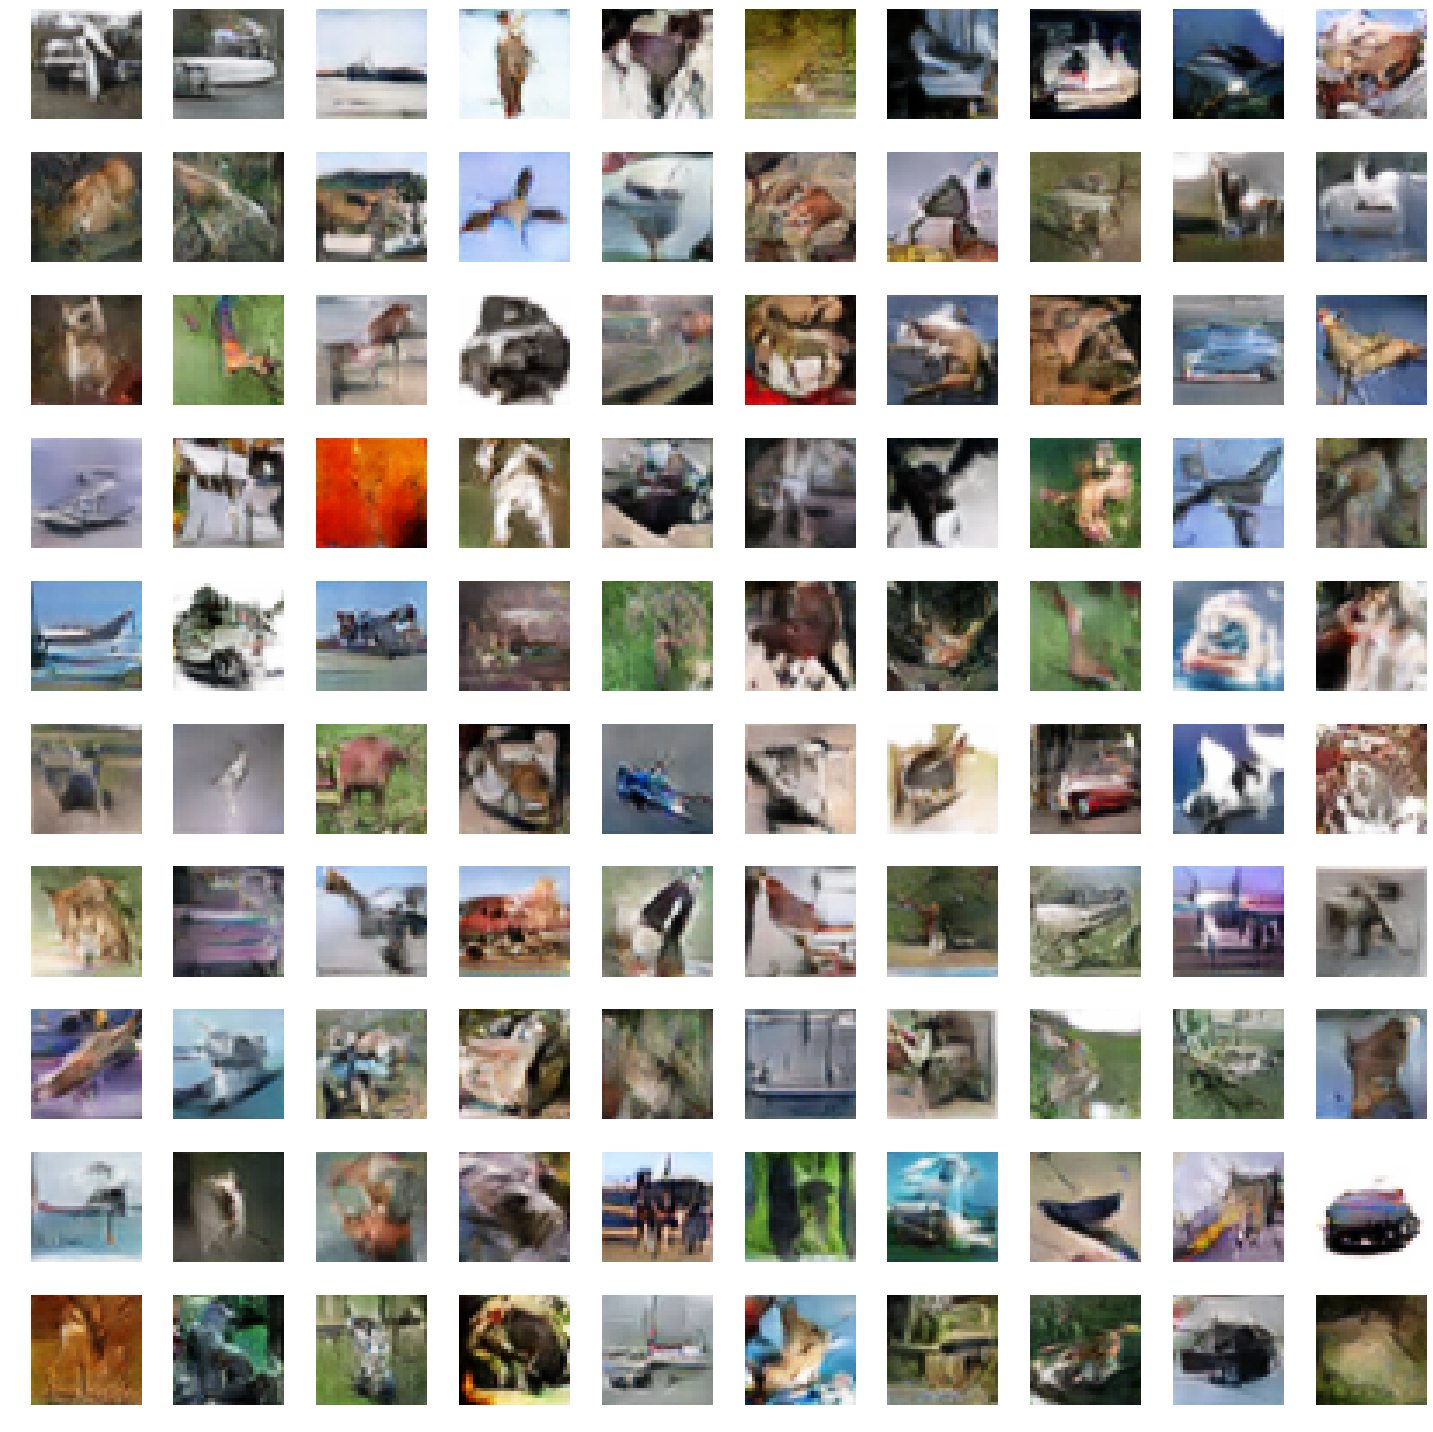

In [14]:
# img = runner.model.sample(100, condition_data=list(range(10))*10)
# runner.load_epoch(25)
runner.model.cpu()
img = runner.model.sample(100)
img = (img+1)/2
import matplotlib.pyplot as plt
fig, arr = plt.subplots(10, 10, figsize=(20, 20))
for i in range(100):
    r = img[i].detach().cpu().numpy().transpose(1,2,0)
    arr[i//10][i%10].axis('off')
    arr[i//10][i%10].imshow(r)#, cmap='gray')
plt.tight_layout()
plt.show()

In [ ]:
runner.report()